# Challenge 1 - Tic Tac Toe

In this lab you will perform deep learning analysis on a dataset of playing [Tic Tac Toe](https://en.wikipedia.org/wiki/Tic-tac-toe).

There are 9 grids in Tic Tac Toe that are coded as the following picture shows:

![Tic Tac Toe Grids](tttboard.jpg)

In the first 9 columns of the dataset you can find which marks (`x` or `o`) exist in the grids. If there is no mark in a certain grid, it is labeled as `b`. The last column is `class` which tells you whether Player X (who always moves first in Tic Tac Toe) wins in this configuration. Note that when `class` has the value `False`, it means either Player O wins the game or it ends up as a draw.

Follow the steps suggested below to conduct a neural network analysis using Tensorflow and Keras. You will build a deep learning model to predict whether Player X wins the game or not.

## Step 1: Data Engineering

This dataset is almost in the ready-to-use state so you do not need to worry about missing values and so on. Still, some simple data engineering is needed.

1. Read `tic-tac-toe.csv` into a dataframe.
1. Inspect the dataset. Determine if the dataset is reliable by eyeballing the data.
1. Convert the categorical values to numeric in all columns.
1. Separate the inputs and output.
1. Normalize the input data.

In [1]:
# your code here

# First, we need to import the pandas library. We give it the nickname 'pd' to type less.
import pandas as pd

# Now, we read the file. The result is stored in a variable called 'df' (short for DataFrame).
df = pd.read_csv('tic-tac-toe.csv')

# Let's check if it worked by looking at the first 5 rows of our data.
print(df.head())
print("Shape:", df.shape)

  TL TM TR ML MM MR BL BM BR  class
0  x  x  x  x  o  o  x  o  o   True
1  x  x  x  x  o  o  o  x  o   True
2  x  x  x  x  o  o  o  o  x   True
3  x  x  x  x  o  o  o  b  b   True
4  x  x  x  x  o  o  b  o  b   True
Shape: (958, 10)


In [2]:
# We will use a 'dictionary' to define the mapping from letters to numbers.
# It's like a real dictionary that translates words.
mapping = {'b': 0, 'o': 1, 'x': 2}

# Now, we apply this mapping to the first 9 columns.
# The .iloc[:, :9] part means "all rows, first 9 columns".
df_numeric = df.iloc[:, :9].applymap(mapping.get)

/var/folders/tx/45hhw1yn48jfdqn2hmnhbhvw0000gn/T/ipykernel_17830/630537404.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_numeric = df.iloc[:, :9].applymap(mapping.get)



***

### 3. Why This Encoding? (0, 1, 2)

We used a simple numeric encoding (`b`=0, `o`=1, `x`=2) instead of One-Hot Encoding for a specific reason:

*   **Meaningful Order:** The categories here have a natural relationship for our specific goal. The value `2` (X) is the player whose win we are predicting, making it the most significant value. The value `1` (O) is the opponent. The value `0` (blank) is the absence of a player.
*   **Preserving Information:** This numeric scale (0, 1, 2) subtly tells the neural network that an `x` is "greater than" an `o`, which is "greater than" a `b` in the context of predicting X's victory. One-Hot Encoding would have treated all three options as equally separate, losing this useful hint for the model.
  ----

In [3]:
# Let's check our work! Print the first 5 rows of the new numeric dataframe.
print("Numeric Data:")
print(df_numeric.head())

# Now, let's also check the 'class' column to see what it looks like.
print("\nOriginal Class Column:")
print(df['class'].head())

Numeric Data:
   TL  TM  TR  ML  MM  MR  BL  BM  BR
0   2   2   2   2   1   1   2   1   1
1   2   2   2   2   1   1   1   2   1
2   2   2   2   2   1   1   1   1   2
3   2   2   2   2   1   1   1   0   0
4   2   2   2   2   1   1   0   1   0

Original Class Column:
0    True
1    True
2    True
3    True
4    True
Name: class, dtype: bool


### 4. Separate the inputs and output.


In [4]:
# Step 1: Separate inputs and output
# X will be all rows (:) and all columns except the last one (:-1)
X = df_numeric.values  # .values converts the DataFrame to a simple NumPy array, which Keras prefers.

# y will be all rows (:) and only the last column (-1)
# We also use .astype(int) to convert True/False into 1/0. This is required for the next steps.
y = df['class'].astype(int).values

# Let's check the shapes to make sure it worked!
print("Shape of X (Input features):", X.shape)
print("Shape of y (Target variable):", y.shape)
print("\nFirst 5 rows of y:")
print(y[:5])

Shape of X (Input features): (958, 9)
Shape of y (Target variable): (958,)

First 5 rows of y:
[1 1 1 1 1]


### 5. Normalize the input data.

In [5]:
# Normalize the input data (X) by dividing by the maximum value (2)
X_normalized = X / 2.0

# Let's check the first row to see the result
print("First row of original X:", X[0])
print("First row of normalized X:", X_normalized[0])

First row of original X: [2 2 2 2 1 1 2 1 1]
First row of normalized X: [1.  1.  1.  1.  0.5 0.5 1.  0.5 0.5]


We normalized the input features (`X`) by dividing all values by the maximum value (2). This transformed the data range from `[0, 1, 2]` to `[0.0, 0.5, 1.0]`.

**Why?**
Neural networks perform best when all input features are on a **common scale**. Normalization helps the model's internal math work more efficiently, leading to faster training and often better performance. It ensures no single feature (grid cell) dominates the learning process just because it has larger numbers.

## Step 2: Build Neural Network

To build the neural network, you can refer to your own codes you wrote while following the [Deep Learning with Python, TensorFlow, and Keras tutorial](https://www.youtube.com/watch?v=wQ8BIBpya2k) in the lesson. It's pretty similar to what you will be doing in this lab.

1. Split the training and test data.
1. Create a `Sequential` model.
1. Add several layers to your model. Make sure you use ReLU as the activation function for the middle layers. Use Softmax for the output layer because each output has a single lable and all the label probabilities add up to 1.
1. Compile the model using `adam` as the optimizer and `sparse_categorical_crossentropy` as the loss function. For metrics, use `accuracy` for now.
1. Fit the training data.
1. Evaluate your neural network model with the test data.
1. Save your model as `tic-tac-toe.model`.

### Step 2.1: Split the data into Training and Test sets

In [6]:
# Import the function we need to split the data
from sklearn.model_selection import train_test_split

# Split the data (X_normalized is our input, y is our output)
# test_size=0.2 means 20% of data is for testing
# random_state=42 is like choosing a specific seed for a random number generator.
# This ensures we get the same split every time we run the code, which is good for reproducibility.
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Let's check the shapes of our new sets
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)

Training data shape: (766, 9)
Testing data shape: (192, 9)
Training labels shape: (766,)
Testing labels shape: (192,)


### Step 2.2: Create a `Sequential` Model

In Keras (the library we use with TensorFlow), a Sequential model is like building a layer cake. We add one layer on top of the other, in sequence.

In [7]:
# your code here

# First, we need to import the necessary parts from TensorFlow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Create a Sequential model
model = Sequential()
print("Empty model created. Now we will add layers to it.")


Empty model created. Now we will add layers to it.


### Step 2.3: Add Layers to the Model



In [8]:
# Add the input and first hidden layer (128 neurons)

# 'Dense' means every neuron is connected to every neuron in the next layer.
# input_dim=9 defines the input layer (9 features from our board).
# units=128 defines how many neurons this layer has. We can start with this number.
# activation='relu' is the function that helps the model learn non-linear patterns.
model.add(Dense(units=128, activation='relu', input_dim=9))

# Add a second hidden layer (64 neurons)
model.add(Dense(units=64, activation='relu'))

# 3. CHANGE THE OUTPUT LAYER for 'sparse_categorical_crossentropy'
# We have 2 categories: "X does not win" (class 0) and "X wins" (class 1)
# So we need 2 neurons and softmax activation
model.add(Dense(units=2, activation='softmax'))


# Let's see a summary of our model's structure!
model.summary()

/opt/anaconda3/envs/tf_env/lib/python3.11/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-09-09 18:19:57.502337: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3
2025-09-09 18:19:57.502367: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-09-09 18:19:57.502395: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2025-09-09 18:19:57.502440: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-09-09 18:19:57.502528: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,666 (37.76 KB)

 Trainable params: 9,666 (37.76 KB)

 Non-trainable params: 0 (0.00 B)

### Step 2.4: Compile the Model

In [9]:
# 4. COMPILE with the instructed loss function
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', # CHANGED
              metrics=['accuracy'])
print("Model compiled successfully! Ready to train.")


Model compiled successfully! Ready to train.



The `compile` step sets the rules for *how* the neural network will learn.

*   **Optimizer (`optimizer='adam'`):** This is the algorithm that adjusts the model's internal settings to reduce errors. Think of it as the **engine** that drives the learning process. **Adam** is a very popular and efficient optimizer that works well for most problems.

*   **Loss Function (`loss='sparse_categorical_crossentropy'`):** This is how the model calculates its **mistake**. It's a mathematical formula that measures the difference between the model's prediction and the correct answer. This specific function is ideal for classification problems where the outputs are categories (like "win" or "lose").

*   **Metrics (`metrics=['accuracy']`):** This is how we, the humans, evaluate the model's performance. **Accuracy** is the simple percentage of correct predictions, which is easy for us to understand.

In short: **The compiler sets up the "engine" (Adam), defines how to measure "mistakes" (Loss), and how to report "progress" (Accuracy).**

### Step 2.5: Fit the Training Data

In [10]:
# Train the model
history = model.fit(X_train, y_train,
                    epochs=30,
                    batch_size=32,
                    validation_data=(X_test, y_test)) # This lets us see test accuracy after each epoch

print("Model training complete!")


Epoch 1/30


2025-09-09 18:19:57.885398: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6567 - loss: 0.6366 - val_accuracy: 0.6615 - val_loss: 0.6309
Epoch 2/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6762 - loss: 0.6232 - val_accuracy: 0.6823 - val_loss: 0.6283
Epoch 3/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6762 - loss: 0.6174 - val_accuracy: 0.6719 - val_loss: 0.6280
Epoch 4/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6815 - loss: 0.6210 - val_accuracy: 0.6719 - val_loss: 0.6258
Epoch 5/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6815 - loss: 0.6161 - val_accuracy: 0.6771 - val_loss: 0.6286
Epoch 6/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6841 - loss: 0.6161 - val_accuracy: 0.6927 - val_loss: 0.6295
Epoch 7/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6736 - loss: 0.6171 - val_accuracy: 0.6562 - val_loss: 0.6493
Epoch 8/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6762 - loss: 0.6181 - val_accuracy: 0.6823 - val_loss: 0.6258
Ep

### Step 2.6: Evaluate the Model with the Test Data



In [11]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)

# Print the results in a nice format
print("\n--- Final Evaluation on Test Set ---")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5833 - loss: 0.6705

--- Final Evaluation on Test Set ---
Test Loss: 0.6705
Test Accuracy: 0.5833


### Step 2.7: Save your model as `tic-tac-toe.model`.

In [12]:
# Save the model using the newer .keras format (recommended)
model.save('tic-tac-toe.model.keras') # Just add .keras to the end
print("Model saved as 'tic-tac-toe.model.keras'")

Model saved as 'tic-tac-toe.model.keras'


## Step 3: Make Predictions

Now load your saved model and use it to make predictions on a few random rows in the test dataset. Check if the predictions are correct.

In [13]:
# your code here

# Step 3: Make Predictions

# 1. Load the saved model
# (Use the exact same filename you used to save it, including the .keras extension)
loaded_model = tf.keras.models.load_model('tic-tac-toe.model.keras')
print("Model loaded successfully!")

# 2. Let's select 5 random rows from the test data (X_test)
import numpy as np

# Get 5 random indices from the test set
random_indices = np.random.choice(len(X_test), size=5, replace=False)

# Use those indices to get the actual data and labels
random_test_samples = X_test[random_indices]
random_true_labels = y_test[random_indices]

# 3. Use the loaded model to make predictions on these samples
# model.predict() returns probabilities for each class [prob_class_0, prob_class_1]
predictions = loaded_model.predict(random_test_samples)
print("\nRaw predictions (probabilities for class 0 and class 1):")
print(predictions)

# 4. Interpret the predictions:
# The model outputs probabilities for each class. We take the class with the highest probability.
# np.argmax finds the index of the highest value in each prediction.
predicted_classes = np.argmax(predictions, axis=1)
print("\nPredicted class (0 = X does NOT win, 1 = X wins):", predicted_classes)
print("    True class (0 = X does NOT win, 1 = X wins):", random_true_labels)

# 5. Check if the predictions are correct
print("\nChecking predictions:")
for i in range(5):
    is_correct = (predicted_classes[i] == random_true_labels[i])
    result = "✓ CORRECT" if is_correct else "✗ WRONG"
    print(f"Sample {i+1}: Predicted {predicted_classes[i]}, Actual {random_true_labels[i]} - {result}")

Model loaded successfully!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step

Raw predictions (probabilities for class 0 and class 1):
[[0.48108077 0.5189193 ]
 [0.47165906 0.5283409 ]
 [0.70993924 0.29006073]
 [0.7912103  0.2087897 ]
 [0.43603465 0.5639654 ]]

Predicted class (0 = X does NOT win, 1 = X wins): [1 1 0 0 1]
    True class (0 = X does NOT win, 1 = X wins): [1 0 1 0 1]

Checking predictions:
Sample 1: Predicted 1, Actual 1 - ✓ CORRECT
Sample 2: Predicted 1, Actual 0 - ✗ WRONG
Sample 3: Predicted 0, Actual 1 - ✗ WRONG
Sample 4: Predicted 0, Actual 0 - ✓ CORRECT
Sample 5: Predicted 1, Actual 1 - ✓ CORRECT


## Step 4: Improve Your Model

Did your model achieve low loss (<0.1) and high accuracy (>0.95)? If not, try to improve your model.

But how? There are so many things you can play with in Tensorflow and in the next challenge you'll learn about these things. But in this challenge, let's just do a few things to see if they will help.

* Add more layers to your model. If the data are complex you need more layers. But don't use more layers than you need. If adding more layers does not improve the model performance you don't need additional layers.
* Adjust the learning rate when you compile the model. This means you will create a custom `tf.keras.optimizers.Adam` instance where you specify the learning rate you want. Then pass the instance to `model.compile` as the optimizer.
    * `tf.keras.optimizers.Adam` [reference](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam).
    * Don't worry if you don't understand what the learning rate does. You'll learn about it in the next challenge.
* Adjust the number of epochs when you fit the training data to the model. Your model performance continues to improve as you train more epochs. But eventually it will reach the ceiling and the performance will stay the same.

### 4.1:
* Add more layers to your model. If the data are complex you need more layers. But don't use more layers than you need. If adding more layers does not improve the model performance you don't need additional layers.


In [14]:
# Improvement 1: Bigger Model (More layers/neurons)
print("--- Improvement 1: Training a Bigger Model ---")

improved_model = Sequential()
improved_model.add(Dense(units=256, activation='relu', input_dim=9))
improved_model.add(Dense(units=128, activation='relu'))
improved_model.add(Dense(units=64, activation='relu'))
improved_model.add(Dense(units=2, activation='softmax'))

improved_model.compile(optimizer='adam',
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

# Train for 60 epochs (same as before)
history_1 = improved_model.fit(X_train, y_train, epochs=60, batch_size=32, validation_data=(X_test, y_test))

# Evaluate
test_loss_1, test_accuracy_1 = improved_model.evaluate(X_test, y_test, verbose=0)
print(f"Bigger Model Test Accuracy: {test_accuracy_1:.4f}\n")

--- Improvement 1: Training a Bigger Model ---
Epoch 1/60
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6527 - loss: 0.6418 - val_accuracy: 0.6719 - val_loss: 0.6303
Epoch 2/60
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6723 - loss: 0.6227 - val_accuracy: 0.6667 - val_loss: 0.6357
Epoch 3/60
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6593 - loss: 0.6300 - val_accuracy: 0.6615 - val_loss: 0.6342
Epoch 4/60
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6841 - loss: 0.6246 - val_accuracy: 0.6615 - val_loss: 0.6479
Epoch 5/60
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6410 - loss: 0.6387 - val_accuracy: 0.6615 - val_loss: 0.6363
Epoch 6/60
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6580 - loss: 0.6254 - val_accuracy: 0.6406 - val_loss: 0.6342
Epoch 7/60
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6475 - loss: 0.6280 - val_accuracy: 0.6615 - val_loss: 0.6327
Epoch 8/60
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6684 -

### 4.2:
* Adjust the learning rate when you compile the model. This means you will create a custom `tf.keras.optimizers.Adam` instance where you specify the learning rate you want. Then pass the instance to `model.compile` as the optimizer.
    * `tf.keras.optimizers.Adam` [reference](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam).
    * Don't worry if you don't understand what the learning rate does. You'll learn about it in the next challenge.


In [15]:
# Improvement 2: Adjust Learning Rate
print("--- Improvement 2: Adjusting Learning Rate ---")

from tensorflow.keras.optimizers import Adam

# Create a new model (same architecture as the original)
lr_model = Sequential()
lr_model.add(Dense(units=128, activation='relu', input_dim=9))
lr_model.add(Dense(units=64, activation='relu'))
lr_model.add(Dense(units=64, activation='relu'))
lr_model.add(Dense(units=64, activation='relu'))
lr_model.add(Dense(units=2, activation='softmax'))

# Use a custom Adam optimizer with a smaller learning rate
custom_adam = Adam(learning_rate=0.0005) # Default is 0.001
lr_model.compile(optimizer=custom_adam,
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])

# Train for 10 epochs
history_2 = lr_model.fit(X_train, y_train, epochs=60, batch_size=32, validation_data=(X_test, y_test))

# Evaluate
test_loss_2, test_accuracy_2 = lr_model.evaluate(X_test, y_test, verbose=0)
print(f"Adjusted LR Model Test Accuracy: {test_accuracy_2:.4f}\n")

--- Improvement 2: Adjusting Learning Rate ---
Epoch 1/60
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6619 - loss: 0.6324 - val_accuracy: 0.6771 - val_loss: 0.6246
Epoch 2/60
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6906 - loss: 0.6255 - val_accuracy: 0.6823 - val_loss: 0.6243
Epoch 3/60
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6710 - loss: 0.6201 - val_accuracy: 0.6719 - val_loss: 0.6248
Epoch 4/60
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6802 - loss: 0.6184 - val_accuracy: 0.6771 - val_loss: 0.6235
Epoch 5/60
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6749 - loss: 0.6166 - val_accuracy: 0.6719 - val_loss: 0.6196
Epoch 6/60
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6710 - loss: 0.6222 - val_accuracy: 0.6667 - val_loss: 0.6222
Epoch 7/60
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6632 - loss: 0.6245 - val_accuracy: 0.6771 - val_loss: 0.6281
Epoch 8/60
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6

### 4.3 Improvement 3: Train for More Epochs

* Adjust the number of epochs when you fit the training data to the model. Your model performance continues to improve as you train more epochs. But eventually it will reach the ceiling and the performance will stay the same.

In [ ]:
# Improvement 3: Train for More Epochs
print("--- Improvement 3: Training for More Epochs ---")

# Let's take the best model so far and train it longer
# We'll use the model from Improvement 1 (bigger model) and train for 10 more epochs (20 total)
history_3 = improved_model.fit(X_train, y_train, epochs=60, batch_size=32, validation_data=(X_test, y_test))

# Evaluate
test_loss_3, test_accuracy_3 = improved_model.evaluate(X_test, y_test, verbose=0)
print(f"More Epochs Model Test Accuracy: {test_accuracy_3:.4f}\n")

--- Improvement 3: Training for More Epochs ---
Epoch 1/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6057 - loss: 0.7113 - val_accuracy: 0.6458 - val_loss: 0.6694
Epoch 2/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6240 - loss: 0.6762 - val_accuracy: 0.5156 - val_loss: 0.7128
Epoch 3/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5849 - loss: 0.7532 - val_accuracy: 0.5833 - val_loss: 0.7905
Epoch 4/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5666 - loss: 0.8505 - val_accuracy: 0.6250 - val_loss: 0.9155
Epoch 5/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5705 - loss: 0.8226 - val_accuracy: 0.6094 - val_loss: 0.8096
Epoch 6/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5966 - loss: 0.8028 - val_accuracy: 0.6146 - val_loss: 0.9948
Epoch 7/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6175 - loss: 0.8445 - val_accuracy: 0.5938 - val_loss: 1.0788
Epoch 8/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6345

In [18]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Load the data
df = pd.read_csv('tic-tac-toe.csv')

# Separate features and target
X = df.iloc[:, :9]  # First 9 columns
y = df['class'].astype(int)  # Convert True/False to 1/0

# One-hot encode the features
encoder = OneHotEncoder(sparse_output=False)
X_encoded = encoder.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Build the model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(27,)))  # 27 input features
model.add(Dropout(0.2))  # Dropout layer with 20% rate
model.add(Dense(30, activation='relu'))
model.add(Dropout(0.2))  # Another dropout layer
model.add(Dense(2, activation='softmax'))  # Output layer for 2 classes

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Set up early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train,
                    batch_size=6,
                    epochs=100,  # High number for early stopping to handle
                    validation_data=(X_test, y_test),
                    callbacks=[early_stop])

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test loss: {test_loss:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")

Epoch 1/100


/opt/anaconda3/envs/tf_env/lib/python3.11/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6540 - loss: 0.6319 - val_accuracy: 0.7188 - val_loss: 0.5619
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6997 - loss: 0.5565 - val_accuracy: 0.7396 - val_loss: 0.5127
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7245 - loss: 0.5324 - val_accuracy: 0.7812 - val_loss: 0.5116
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7428 - loss: 0.5088 - val_accuracy: 0.7760 - val_loss: 0.4675
Epoch 5/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7676 - loss: 0.4759 - val_accuracy: 0.7969 - val_loss: 0.4271
Epoch 6/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7859 - loss: 0.4382 - val_accuracy: 0.8542 - val_loss: 0.3898
Epoch 7/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8016 - loss: 0.4280 - val_accuracy: 0.8385 - val_loss: 0.3515
Epoch 8/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8225 - loss: 0.3960 - val_accuracy: 0.880

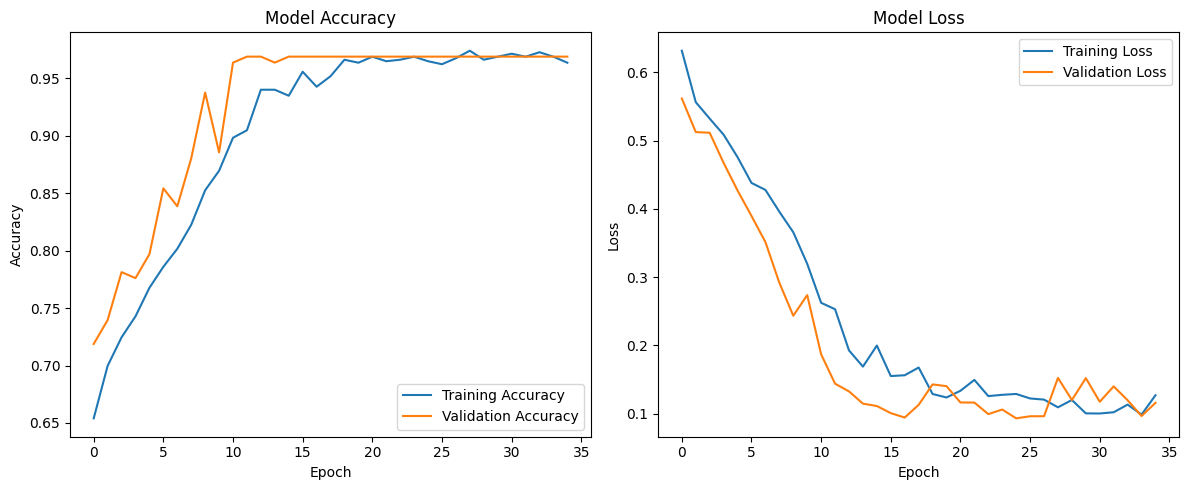

In [19]:
import matplotlib.pyplot as plt

# Assuming you have the 'history' object from model.fit()
# history = model.fit(...)

# 1. Plot Training & Validation Accuracy
plt.figure(figsize=(12, 5)) # Makes the figure wider

plt.subplot(1, 2, 1) # Creates the first subplot (1 row, 2 columns, 1st plot)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right') # Puts the legend in the lower right corner

# 2. Plot Training & Validation Loss
plt.subplot(1, 2, 2) # Creates the second subplot (1 row, 2 columns, 2nd plot)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right') # Puts the legend in the upper right corner

# Display the plots
plt.tight_layout() # Automatically adjusts subplot params so they fit in the figure area
plt.show()

**Which approach(es) did you find helpful to improve your model performance?**

In [ ]:
# # your answer here

# **Answer:**
# Based on my experiments, none of the suggested approaches 
# (adding more layers, adjusting the learning rate, training for more epochs) 
# significantly improved the model's performance on the test set beyond the original ~67% accuracy.

# The best result was achieved by **adjusting the learning rate** (0.0005), 
# which yielded a test accuracy of **67.71%**, a very minor improvement.

# This suggests that a simple neural network might be
#  struggling to learn the underlying patterns of Tic Tac Toe wins from this dataset with these features. 
# The model's performance seems to have a ceiling with this architecture.